In [1]:
from sklearn.cluster import KMeans
import clusters as cl
from sklearn.datasets import make_blobs
import minisom
from minisom import MiniSom 
import pandas as pd
import numpy as np

# this will reload modules that have changed
%load_ext autoreload
%autoreload 2

In [2]:
data, y = make_blobs(n_samples=20000, centers=2, n_features=2,
...                   random_state=0)
>>> print(data)


[[3.07833455 1.04601911]
 [2.04131654 3.81223592]
 [0.3753131  5.01025894]
 ...
 [2.06059317 0.65352547]
 [2.66953026 1.27779282]
 [1.20710958 1.18873291]]


In [3]:
#data = data[data.columns[:-1]]
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
#data = data.values
print(data)

[[ 1.38083983 -0.78751278]
 [ 0.46901023  0.61367463]
 [-0.99587393  1.220516  ]
 ...
 [ 0.48595979 -0.9863248 ]
 [ 1.02138624 -0.67011114]
 [-0.2644916  -0.71522316]]


Create data and data labels for each point

In [4]:
k = cl.K(data)
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(n_clusters=4)

In [5]:
print(y)
print(kmeans.labels_)

[1 0 0 ... 1 1 1]
[0 3 1 ... 2 0 2]


In [6]:
cl.labelClusters(kmeans.labels_, y)

{0: 1, 3: 0, 1: 0, 2: 1}


{0: 1, 3: 0, 1: 0, 2: 1}

In [7]:
cl.getClusters(data, y)

(0, 1, 4)

In [8]:
cl.assignClusters(kmeans.labels_, y)

{0: 1, 3: 0, 1: 0, 2: 1}


[3,
 1,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 0,
 2,
 3,
 1,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 0,
 2,
 3,
 1,
 3,
 1,
 0,
 2,
 3,
 1,
 0,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 0,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,


In [9]:
cl.randIndex(kmeans.labels_, y)

[1 0 0 ... 1 1 1]
[0 3 1 ... 2 0 2]


0.7109438121906095

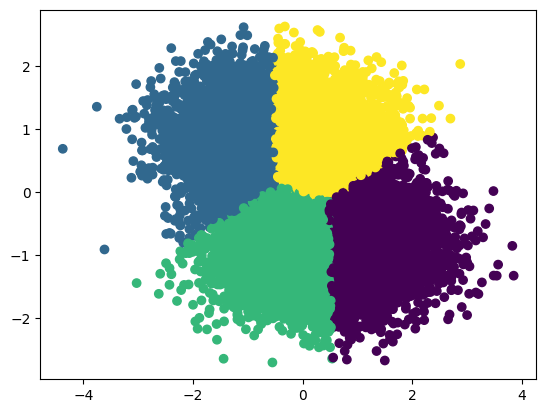

In [10]:
cl.plotKMeans(data, kmeans.labels_)

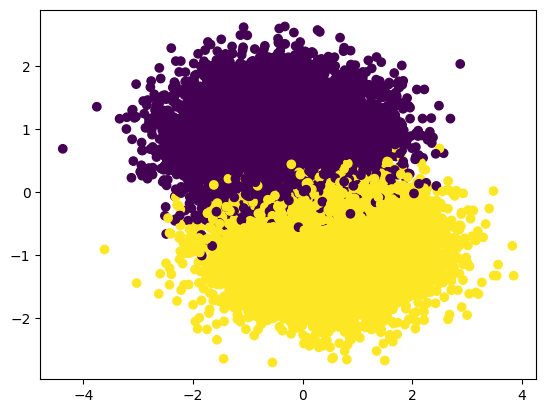

In [11]:
cl.plotKMeans(data, y)

In [12]:
k

4

In [13]:
def return3Values() :
    return 1,2,3

In [14]:
z = return3Values()

In [15]:
z

(1, 2, 3)

In [16]:
def use_kmeans(data, tlabels):
    k = cl.K(data)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    
    cl.plotKMeans(data, tlabels)
    
    return kmeans, cl.randIndex(kmeans.labels_, tlabels), k
    

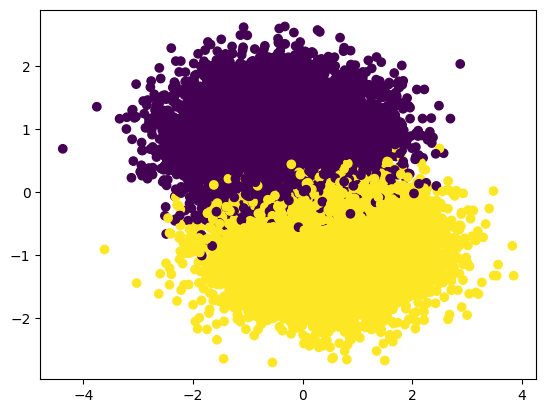

[1 0 0 ... 1 1 1]
[3 0 2 ... 1 3 1]


(KMeans(n_clusters=4), 0.7109013600680034, 4)

In [17]:
use_kmeans(data, y)

In [18]:
#som = MiniSom(300, 300, 2, sigma=0.3, learning_rate=0.3) # initialization of 6x6 SOM
## Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=2.5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.20812513988948309


In [19]:
som.winner(data[0])

(7, 7)

In [20]:
somlist = []

In [21]:
#MAKE BMU LIST
for x in range(len(data)):
    somlist.append(som.winner(data[x]))
print(somlist)

[(7, 7), (3, 7), (0, 3), (8, 7), (2, 4), (0, 4), (6, 0), (8, 3), (1, 1), (1, 2), (1, 6), (5, 5), (4, 5), (2, 6), (4, 3), (6, 4), (7, 0), (3, 3), (7, 1), (8, 2), (1, 0), (0, 5), (2, 2), (8, 6), (2, 3), (6, 3), (0, 1), (2, 1), (3, 3), (1, 5), (3, 2), (0, 0), (1, 3), (1, 3), (3, 1), (8, 6), (4, 0), (0, 4), (1, 7), (1, 0), (7, 4), (3, 8), (1, 5), (0, 4), (8, 0), (4, 1), (2, 2), (0, 4), (2, 3), (2, 4), (0, 1), (8, 7), (5, 3), (3, 8), (6, 7), (3, 1), (1, 8), (6, 2), (1, 0), (6, 7), (7, 5), (7, 8), (0, 6), (4, 6), (8, 6), (2, 4), (1, 4), (8, 1), (8, 3), (2, 4), (0, 0), (6, 4), (1, 8), (8, 6), (8, 4), (6, 5), (0, 0), (1, 6), (1, 6), (0, 6), (0, 0), (1, 2), (4, 8), (7, 7), (0, 4), (6, 3), (0, 8), (6, 2), (2, 8), (2, 5), (0, 2), (3, 8), (1, 1), (2, 7), (7, 8), (0, 6), (0, 5), (4, 8), (7, 4), (0, 2), (1, 8), (0, 1), (0, 5), (0, 3), (1, 2), (7, 6), (0, 5), (0, 0), (8, 8), (8, 0), (1, 1), (6, 1), (3, 6), (6, 4), (4, 3), (5, 4), (3, 7), (3, 5), (5, 1), (8, 0), (0, 0), (1, 0), (4, 0), (6, 7), (1, 7),

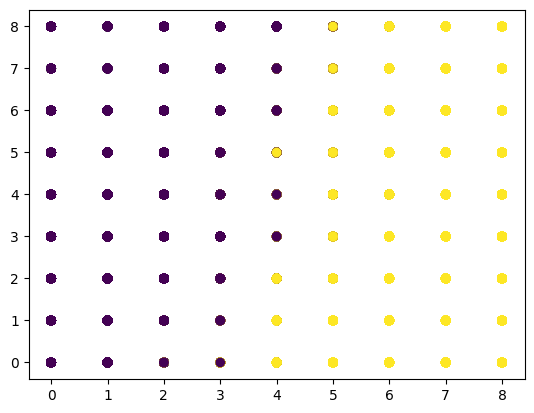

[1 0 0 ... 1 1 1]
[1 3 0 ... 2 1 2]


(KMeans(n_clusters=4), 0.7074238061903095, 4)

In [22]:
use_kmeans(somlist, y)

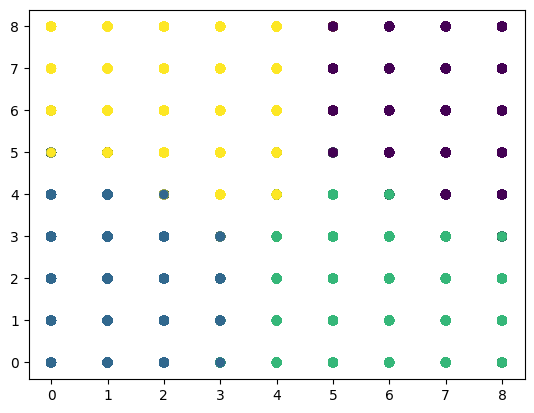

[0 3 1 ... 2 0 2]
[2 3 1 ... 0 2 0]


(KMeans(n_clusters=4), 0.9299849692484624, 4)

In [23]:
use_kmeans(somlist, kmeans.labels_)